# Data Analysis Project : Bike Sharing Dataset
- **Nama:** Damar Syarafi Ramadhan
- **Email:** damarsyarafi.rmdhn@gmail.com
- **ID Dicoding:** maresan

## Defining Business Questions

Question :
- In 24 Hours, When Does the Average User Rent A Bike?
- How Much Average of Temp & Humid by Season?
- How Many Users Uses Bike Rentals in Season?
- How Many Users Uses Bike Rentals on Weekdays Compared to Weekends?
- How many users use bicycle rental services in Daily based on user type category?

## Import Packages/Library Used

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
#Load File Rental Sepeda Harian
rent_daily = pd.read_csv("data\day.csv")

#Menampilkan Table
rent_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
#Load File Rental Sepeda per Jam
rent_hourly = pd.read_csv("data\hour.csv")

#Menampilkan Table
rent_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset characteristics
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [5]:
rent_daily.info()
print('Data missing : ', rent_daily.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Data missing :  instant       0
dteday        0
season        0
yr            0
mnth         

In [6]:
print('Duplicated :', rent_daily.duplicated().sum())

Duplicated : 0


In [7]:
rent_daily.info()
print('Data missing : ', rent_daily.isna().sum())
print('Duplicated :', rent_hourly.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Data missing :  instant       0
dteday        0
season        0
yr            0
mnth         

In [8]:
rent_daily.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [9]:
rent_hourly.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2012-12-31,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


**Insight:**
+ Cleaning
    - No Null & Duplicated Data
    - Data Format on 'dteday' should be datetime format
    - Change labeling number to Categorical label on season, weathersit, workingday, holiday
    - Un-normalized value temp, atemp, hum, windspeed

+ desc :
    - 731 instand (id) value is filled no duplicated
    - average user rent bike between **summer** pointed with average 'season' = 2.49, supported with average 6th month (average 'mnth' = 6.5)
    - On 'holiday' the occurrence of the number 1 is very small in the quartile range, resulting in a average = 0.28, bicycle rental users use it on weekdays, supported by an average of 'workingday' = 0.68
    - On 'weathersit' many user rent on **clear** weather ('weathersit' = 1) supported with average = 1.39
    - Many more **registered** users then Casual users using bike rental systems

### Cleaning Data

In [10]:
#Mengubah format 'dteday' menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  rent_daily[column] = pd.to_datetime(rent_daily[column])
  
rent_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
#Mengubah format 'dteday' menjadi datetime
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  rent_hourly[column] = pd.to_datetime(rent_hourly[column])
  
rent_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
cols = rent_daily.columns
cols

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
# Cek Outlier dengan IQR Outlier
def outlier_iqr(data):
    outliers = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for i in data:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers

numeric_cols = rent_daily[cols].select_dtypes(include='number')

print('Before Drop Outliers')
data_outlier = {}
for col in numeric_cols:
    data_outlier[col] = outlier_iqr(rent_daily[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

Before Drop Outliers
Outlier (instant): 0 outliers
Outlier (season): 0 outliers
Outlier (yr): 0 outliers
Outlier (mnth): 0 outliers
Outlier (holiday): 21 outliers
Outlier (weekday): 0 outliers
Outlier (workingday): 0 outliers
Outlier (weathersit): 0 outliers
Outlier (temp): 0 outliers
Outlier (atemp): 0 outliers
Outlier (hum): 2 outliers
Outlier (windspeed): 13 outliers
Outlier (casual): 44 outliers
Outlier (registered): 0 outliers
Outlier (cnt): 0 outliers


In [14]:
#Drop Outliers
def outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    df = np.where(df > upper_bound, upper_bound, df)
    df = np.where(df < lower_bound, lower_bound, df)
    return df

In [15]:
rent_daily.holiday = outlier(rent_daily.holiday)
rent_daily.windspeed = outlier(rent_daily.windspeed)
rent_daily.casual = outlier(rent_daily.casual)

cols = ['holiday', 'windspeed', 'casual']

print('After Drop Outliers')
data_outlier = {}
for col in numeric_cols:
    data_outlier[col] = outlier_iqr(rent_daily[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

After Drop Outliers
Outlier (instant): 0 outliers
Outlier (season): 0 outliers
Outlier (yr): 0 outliers
Outlier (mnth): 0 outliers
Outlier (holiday): 0 outliers
Outlier (weekday): 0 outliers
Outlier (workingday): 0 outliers
Outlier (weathersit): 0 outliers
Outlier (temp): 0 outliers
Outlier (atemp): 0 outliers
Outlier (hum): 2 outliers
Outlier (windspeed): 0 outliers
Outlier (casual): 0 outliers
Outlier (registered): 0 outliers
Outlier (cnt): 0 outliers


In [16]:
cols = rent_hourly.columns

In [17]:
numeric_cols = rent_hourly[cols].select_dtypes(include='number')

print('Before Drop Outliers')
data_outlier = {}
for col in numeric_cols:
    data_outlier[col] = outlier_iqr(rent_hourly[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

Before Drop Outliers
Outlier (instant): 0 outliers
Outlier (season): 0 outliers
Outlier (yr): 0 outliers
Outlier (mnth): 0 outliers
Outlier (hr): 0 outliers
Outlier (holiday): 500 outliers
Outlier (weekday): 0 outliers
Outlier (workingday): 0 outliers
Outlier (weathersit): 3 outliers
Outlier (temp): 0 outliers
Outlier (atemp): 0 outliers
Outlier (hum): 22 outliers
Outlier (windspeed): 342 outliers
Outlier (casual): 1192 outliers
Outlier (registered): 680 outliers
Outlier (cnt): 505 outliers


In [18]:
rent_hourly.holiday = outlier(rent_hourly.holiday)
rent_hourly.windspeed = outlier(rent_hourly.windspeed)
rent_hourly.casual = outlier(rent_hourly.casual)
rent_hourly.registered = outlier(rent_hourly.registered)
rent_hourly.cnt = outlier(rent_hourly.cnt)

cols = ['holiday', 'windspeed', 'casual', 'registered', 'cnt']

print('After Drop Outliers')
data_outlier = {}
for col in numeric_cols:
    data_outlier[col] = outlier_iqr(rent_hourly[col])
    print('Outlier (' + col + '):', len(data_outlier[col]), 'outliers')

After Drop Outliers
Outlier (instant): 0 outliers
Outlier (season): 0 outliers
Outlier (yr): 0 outliers
Outlier (mnth): 0 outliers
Outlier (hr): 0 outliers
Outlier (holiday): 0 outliers
Outlier (weekday): 0 outliers
Outlier (workingday): 0 outliers
Outlier (weathersit): 3 outliers
Outlier (temp): 0 outliers
Outlier (atemp): 0 outliers
Outlier (hum): 22 outliers
Outlier (windspeed): 0 outliers
Outlier (casual): 0 outliers
Outlier (registered): 0 outliers
Outlier (cnt): 0 outliers


In [19]:
rent_daily["cnt"] = rent_daily["casual"] + rent_daily["registered"]
rent_daily["temp"] = rent_daily["temp"] * 41
rent_daily["atemp"] = rent_daily["atemp"] * 50
rent_daily["hum"] = rent_daily["hum"] * 100
rent_daily["windspeed"] = rent_daily["windspeed"] * 67

In [20]:
rent_hourly["cnt"] = rent_hourly["casual"] + rent_hourly["registered"]
rent_hourly["temp"] = rent_hourly["temp"] * 41
rent_hourly["atemp"] = rent_hourly["atemp"] * 50
rent_hourly["hum"] = rent_hourly["hum"] * 100
rent_hourly["windspeed"] = rent_hourly["windspeed"] * 67

In [21]:
rent_daily.yr = rent_daily.dteday.dt.year
rent_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0.0,6,0,2,14.110847,18.18125,80.5833,10.749882,331.0,654,985.0
1,2,2011-01-02,1,2011,1,0.0,0,0,2,14.902598,17.68695,69.6087,16.652113,131.0,670,801.0
2,3,2011-01-03,1,2011,1,0.0,1,1,1,8.050924,9.47025,43.7273,16.636703,120.0,1229,1349.0
3,4,2011-01-04,1,2011,1,0.0,2,1,1,8.200000,10.60610,59.0435,10.739832,108.0,1454,1562.0
4,5,2011-01-05,1,2011,1,0.0,3,1,1,9.305237,11.46350,43.6957,12.522300,82.0,1518,1600.0


In [22]:
rent_hourly.yr = rent_hourly.dteday.dt.year
rent_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,0.0,6,0,1,9.84,14.395,81.0,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,2011,1,1,0.0,6,0,1,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,2011,1,2,0.0,6,0,1,9.02,13.635,80.0,0.0,5.0,27.0,32.0
3,4,2011-01-01,1,2011,1,3,0.0,6,0,1,9.84,14.395,75.0,0.0,3.0,10.0,13.0
4,5,2011-01-01,1,2011,1,4,0.0,6,0,1,9.84,14.395,75.0,0.0,0.0,1.0,1.0


In [23]:
season_mappings = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall',
    4 : 'winter'
}

weathersit_mappings = {
    1 : 'Clear Cloudy',
    2 : 'Mist Cloudy',
    3 : 'Light Rain/Snow',
    4 : 'Heavy Rain/Snow'
}

holiday_mappings = {
    0 : 'Not Holiday',
    1 : 'Holiday'
}

workingday_mappings = {
    0 : 'Weekend/Holiday',
    1 : 'Workingday'
}

In [24]:
rent_daily['season'] = rent_daily['season'].map(season_mappings)
rent_daily['weathersit'] = rent_daily['weathersit'].map(weathersit_mappings)
rent_daily['holiday'] = rent_daily['holiday'].map(holiday_mappings)
rent_daily['workingday'] = rent_daily['workingday'].map(workingday_mappings)

print("Dataframe after Mapping: ")
rent_daily.info()

Dataframe after Mapping: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    float64       
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    float64       
dtype

In [25]:
rent_hourly['season'] = rent_hourly['season'].map(season_mappings)
rent_hourly['weathersit'] = rent_hourly['weathersit'].map(weathersit_mappings)
rent_hourly['holiday'] = rent_hourly['holiday'].map(holiday_mappings)
rent_hourly['workingday'] = rent_hourly['workingday'].map(workingday_mappings)

print("Dataframe after Mapping: ")
rent_daily.info()

Dataframe after Mapping: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    float64       
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    float64       
dtype

In [26]:
rent_daily['yr'] = rent_daily['dteday'].dt.year
rent_hourly['yr'] = rent_hourly['dteday'].dt.year

In [27]:
rent_daily

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,Not Holiday,6,Weekend/Holiday,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,331.0,654,985.0
1,2,2011-01-02,spring,2011,1,Not Holiday,0,Weekend/Holiday,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,131.0,670,801.0
2,3,2011-01-03,spring,2011,1,Not Holiday,1,Workingday,Clear Cloudy,8.050924,9.47025,43.7273,16.636703,120.0,1229,1349.0
3,4,2011-01-04,spring,2011,1,Not Holiday,2,Workingday,Clear Cloudy,8.200000,10.60610,59.0435,10.739832,108.0,1454,1562.0
4,5,2011-01-05,spring,2011,1,Not Holiday,3,Workingday,Clear Cloudy,9.305237,11.46350,43.6957,12.522300,82.0,1518,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,spring,2012,12,Not Holiday,4,Workingday,Mist Cloudy,10.420847,11.33210,65.2917,23.458911,247.0,1867,2114.0
727,728,2012-12-28,spring,2012,12,Not Holiday,5,Workingday,Mist Cloudy,10.386653,12.75230,59.0000,10.416557,644.0,2451,3095.0
728,729,2012-12-29,spring,2012,12,Not Holiday,6,Weekend/Holiday,Mist Cloudy,10.386653,12.12000,75.2917,8.333661,159.0,1182,1341.0
729,730,2012-12-30,spring,2012,12,Not Holiday,0,Weekend/Holiday,Clear Cloudy,10.489153,11.58500,48.3333,23.500518,364.0,1432,1796.0


In [28]:
rent_hourly

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,Not Holiday,6,Weekend/Holiday,Clear Cloudy,9.84,14.395,81.0,0.0000,3.0,13.0,16.0
1,2,2011-01-01,spring,2011,1,1,Not Holiday,6,Weekend/Holiday,Clear Cloudy,9.02,13.635,80.0,0.0000,8.0,32.0,40.0
2,3,2011-01-01,spring,2011,1,2,Not Holiday,6,Weekend/Holiday,Clear Cloudy,9.02,13.635,80.0,0.0000,5.0,27.0,32.0
3,4,2011-01-01,spring,2011,1,3,Not Holiday,6,Weekend/Holiday,Clear Cloudy,9.84,14.395,75.0,0.0000,3.0,10.0,13.0
4,5,2011-01-01,spring,2011,1,4,Not Holiday,6,Weekend/Holiday,Clear Cloudy,9.84,14.395,75.0,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,spring,2012,12,19,Not Holiday,1,Workingday,Mist Cloudy,10.66,12.880,60.0,11.0014,11.0,108.0,119.0
17375,17376,2012-12-31,spring,2012,12,20,Not Holiday,1,Workingday,Mist Cloudy,10.66,12.880,60.0,11.0014,8.0,81.0,89.0
17376,17377,2012-12-31,spring,2012,12,21,Not Holiday,1,Workingday,Clear Cloudy,10.66,12.880,60.0,11.0014,7.0,83.0,90.0
17377,17378,2012-12-31,spring,2012,12,22,Not Holiday,1,Workingday,Clear Cloudy,10.66,13.635,56.0,8.9981,13.0,48.0,61.0


In [29]:
rent_daily.to_csv('dashboard\df_daily_cleaned.csv')
rent_hourly.to_csv('dashboard\df_hour_cleaned.csv')

## Exploratory Data Analysis (EDA)

In [30]:
rent_daily.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
instant,731.0,NaN,NaN,NaN,366.0,1.0,183.5,366.0,548.5,731.0,211.165812
dteday,731,NaN,NaN,NaN,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
season,731,4,fall,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,731.0,NaN,NaN,NaN,2011.500684,2011.0,2011.0,2012.0,2012.0,2012.0,0.500342
mnth,731.0,NaN,NaN,NaN,6.519836,1.0,4.0,7.0,10.0,12.0,3.451913
holiday,731,1,Not Holiday,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,731.0,NaN,NaN,NaN,2.997264,0.0,1.0,3.0,5.0,6.0,2.004787
workingday,731,2,Workingday,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,731,3,Clear Cloudy,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,731.0,NaN,NaN,NaN,20.310776,2.424346,13.820424,20.431653,26.872076,35.328347,7.505091


In [31]:
rent_hourly.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
instant,17379.0,NaN,NaN,NaN,8690.0,1.0,4345.5,8690.0,13034.5,17379.0,5017.0295
dteday,17379,NaN,NaN,NaN,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379,4,fall,4496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,17379.0,NaN,NaN,NaN,2011.502561,2011.0,2011.0,2012.0,2012.0,2012.0,0.500008
mnth,17379.0,NaN,NaN,NaN,6.537775,1.0,4.0,7.0,10.0,12.0,3.438776
hr,17379.0,NaN,NaN,NaN,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
holiday,17379,1,Not Holiday,17379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,17379.0,NaN,NaN,NaN,3.003683,0.0,1.0,3.0,5.0,6.0,2.005771
workingday,17379,2,Workingday,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weathersit,17379,4,Clear Cloudy,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

In [32]:
def univariate_analisis(df, x):
    num_cols = len(x.columns)
    cols_per_row = 4
    num_rows = (num_cols + cols_per_row - 1) // cols_per_row
    
    plt.figure(figsize=(25, 10))
    
    for idx, col in enumerate(numeric_cols):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distributions of {col}')
        plt.xlabel(col)
        plt.ylabel('frequency')
    
    plt.tight_layout()
    plt.show()

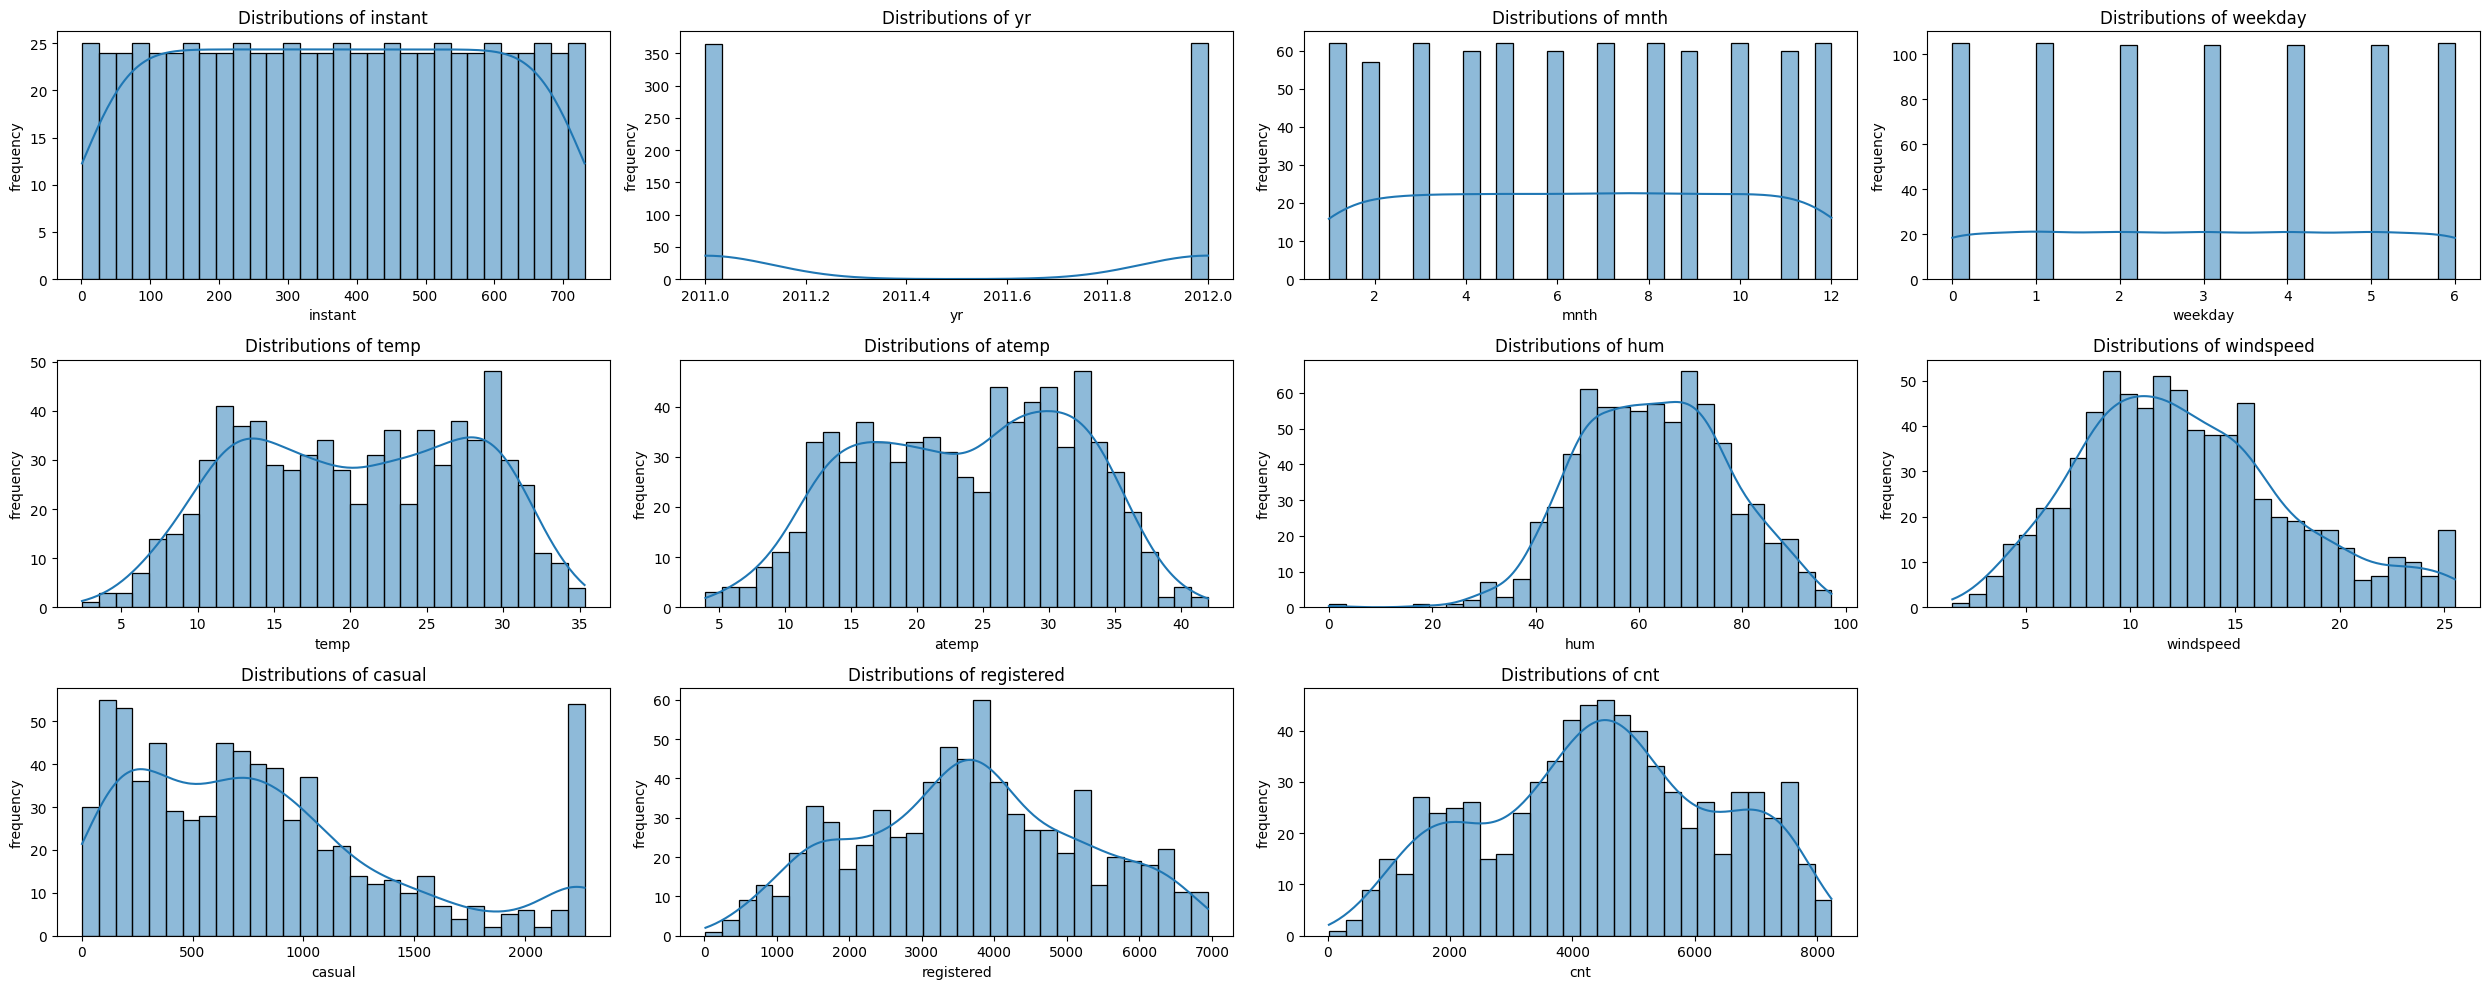

In [33]:
numeric_cols = rent_daily.select_dtypes(include='number')
univariate_analisis(rent_daily, numeric_cols)

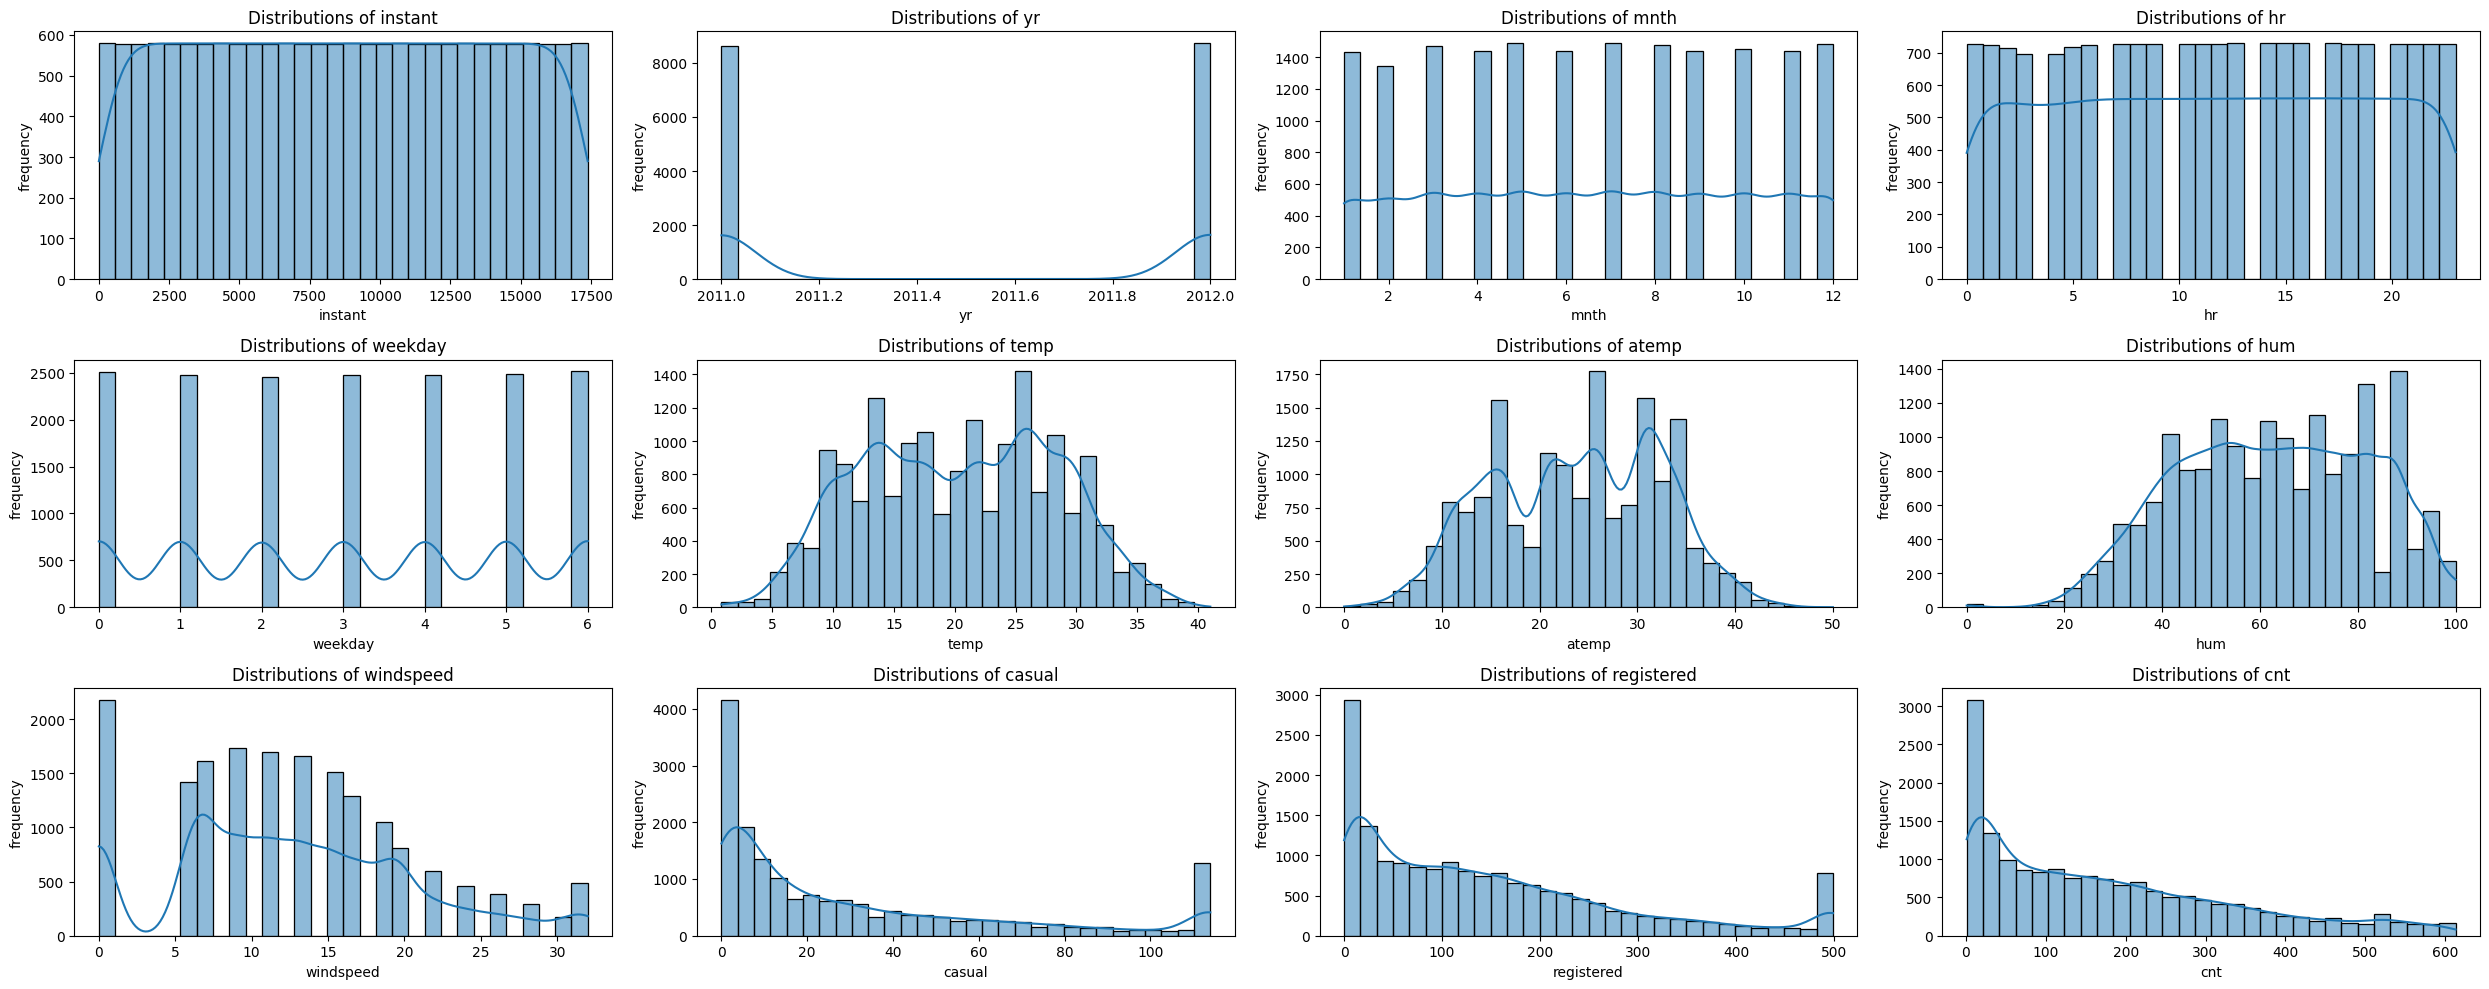

In [34]:
numeric_cols = rent_hourly.select_dtypes(include='number')
univariate_analisis(rent_hourly, numeric_cols)

### Bivariate Analysis

In [71]:
seasonby = rent_daily.groupby(by='season').cnt.mean().reset_index()
seasonby

,season,cnt
0,fall,5617.356383
1,spring,2599.225138
2,summer,4942.918478
3,winter,4715.001404


In [36]:
seasonth = rent_daily.groupby(by='season').agg({
    'temp' : 'mean',
    'hum' : 'mean'}).reset_index()
seasonth

,season,temp,hum
0,fall,28.958682,63.348206
1,spring,12.207650,58.290291
2,summer,22.320611,62.694833
3,winter,17.339148,66.871917


In [69]:
feelby = rent_daily.groupby('season').atemp.mean()
feelby

season
fall      32.794920
spring    14.845697
summer    26.015366
winter    20.776937
Name: atemp, dtype: float64

In [37]:
workingby = rent_daily.groupby(by='workingday').cnt.mean().reset_index()
workingby

,workingday,cnt
0,Weekend/Holiday,4255.767316
1,Workingday,4584.415500


In [62]:
windby_season = rent_daily.groupby('season').windspeed.mean().reset_index()
windby_season.sort_values(by='windspeed', ascending=False)

,season,windspeed
1,spring,14.229444
2,summer,13.628196
0,fall,11.530366
3,winter,11.501406


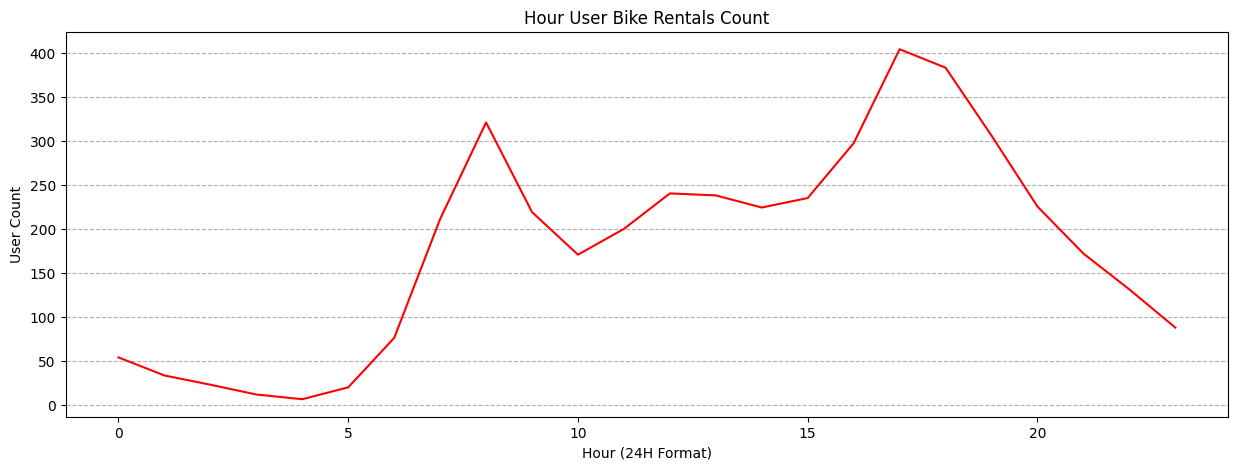

In [38]:
hourly_user = rent_hourly.groupby(by='hr')['cnt'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(hourly_user, x='hr', y='cnt', color='red')
plt.grid(True, which='major', axis='y', linestyle='--')


plt.title('Hour User Bike Rentals Count')
plt.xlabel('Hour (24H Format)')
plt.ylabel('User Count')
plt.show()

In [39]:
daily_user = rent_daily.groupby(by='weekday')['cnt'].mean().reset_index()
daily_user

,weekday,cnt
0,0,4184.857143
1,1,4327.757143
2,2,4510.663462
3,3,4545.699519
4,4,4667.259615
5,5,4688.343750
6,6,4444.009524


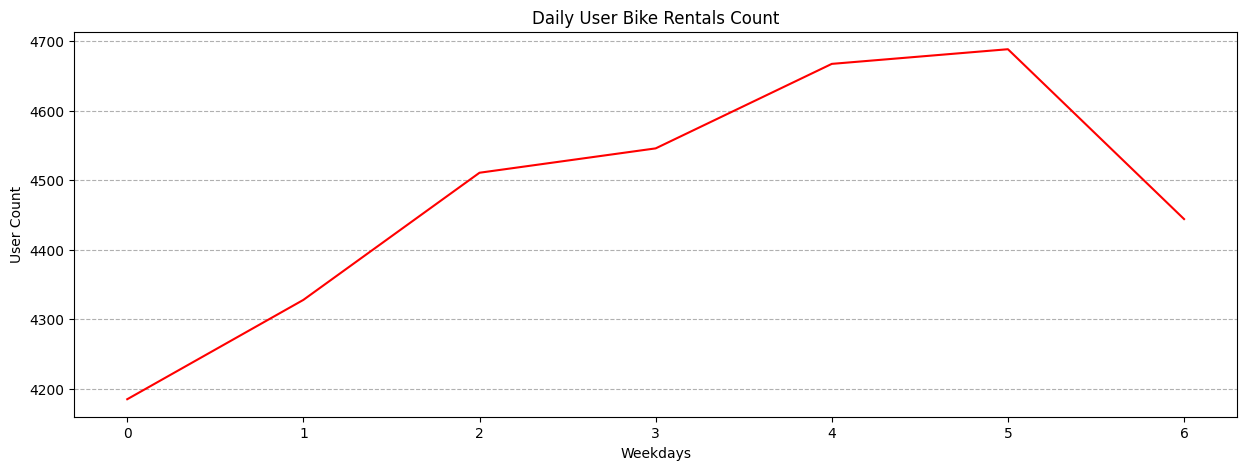

In [40]:
plt.figure(figsize=(15, 5))
sns.lineplot(daily_user, x='weekday', y='cnt', color='red')

plt.title('Daily User Bike Rentals Count')
plt.grid(True, which='major', axis='y', linestyle='--')
plt.xlabel('Weekdays')
plt.ylabel('User Count')
plt.show()

In [41]:
monthly_count_user = rent_daily.groupby(by='mnth').cnt.mean().reset_index()
monthly_count_user

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3674.116935
3,4,4444.112500
4,5,5282.870968
5,6,5723.454167
6,7,5537.459677
7,8,5654.120968
8,9,5722.566667
9,10,5170.032258


- User tend to rents bike on **Clear** weather for their choice of transportation going to workplace and off from workplace
- On weekends, user rarely rents bike

### Multivariate Analysis

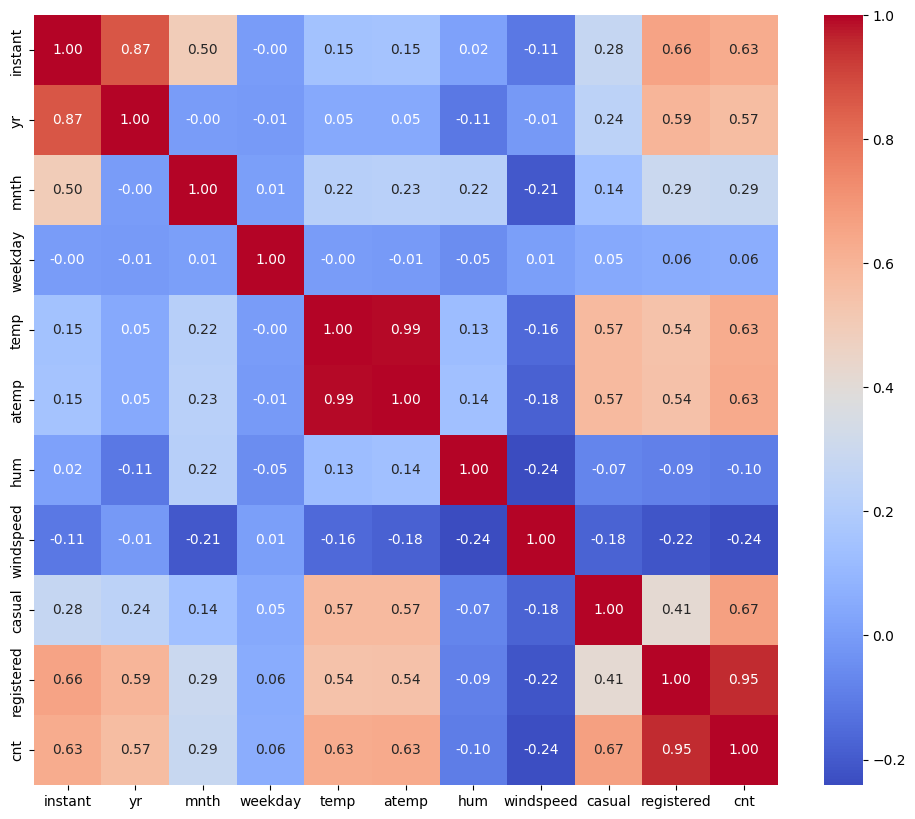

In [42]:
corrmap = rent_daily.select_dtypes(include='number')
correlation_mat = corrmap.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_mat, cmap='coolwarm', annot = True, fmt='.2f')
plt.show()

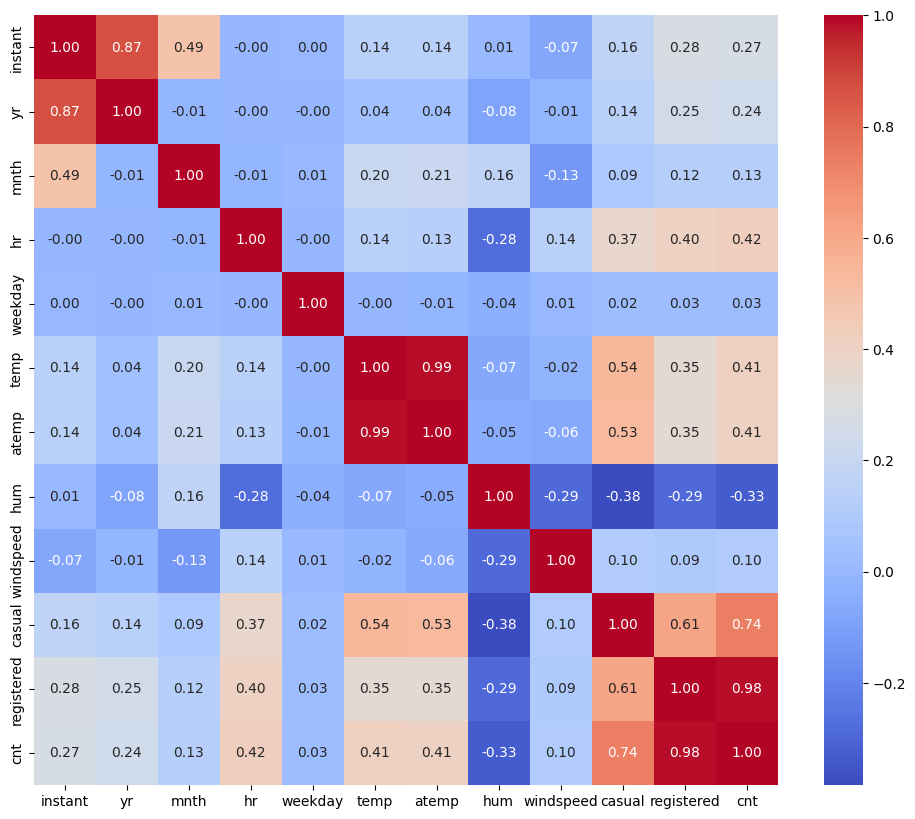

In [43]:
corrmap = rent_hourly.select_dtypes(include='number')
correlation_mat = corrmap.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_mat, cmap='coolwarm', annot = True, fmt='.2f')
plt.show()

In [44]:
monthly_category_user = rent_daily.groupby(by='mnth')[['casual', 'registered']].mean().reset_index()
monthly_category_user

,mnth,casual,registered
0,1,194.225806,1982.112903
1,2,262.508772,2392.789474
2,3,698.697581,2975.419355
3,4,972.579167,3471.533333
4,5,1147.370968,4135.500000
5,6,1182.854167,4540.600000
6,7,1234.379032,4303.080645
7,8,1151.620968,4502.500000
8,9,1128.100000,4594.466667
9,10,934.677419,4235.354839


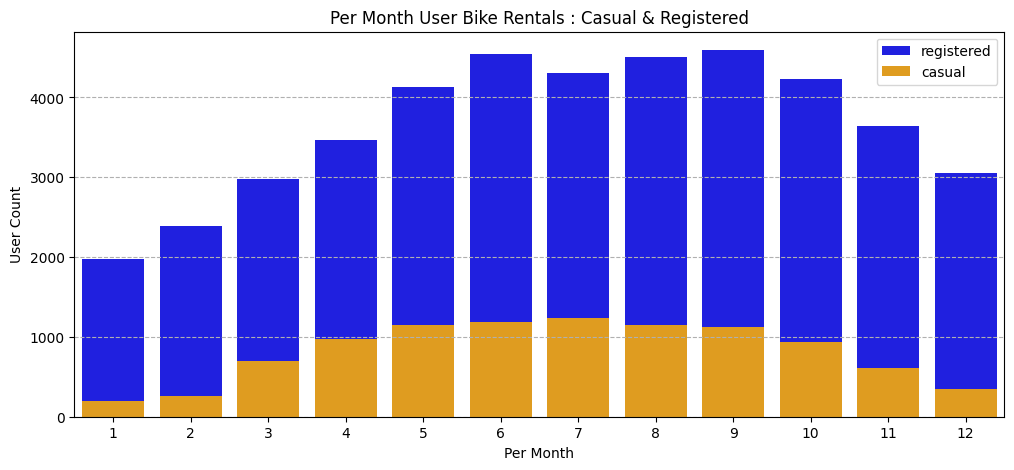

In [45]:
plt.figure(figsize=(12, 5))
sns.barplot(monthly_category_user, x='mnth', y='registered', label='registered', color='blue', errorbar=None)
sns.barplot(monthly_category_user, x='mnth', y='casual', label='casual', color='orange', errorbar=None)

plt.title('Per Month User Bike Rentals : Casual & Registered')
plt.grid(True, which='major', axis='y', linestyle='--')

plt.xlabel('Per Month')
plt.ylabel('User Count')
plt.show()

In [46]:
season_temp = rent_daily.groupby(by='season')[['temp', 'atemp']].mean().sort_values(by='atemp', ascending=False)
season_temp

,temp,atemp
season,,
fall,28.958682,32.794920
summer,22.320611,26.015366
winter,17.339148,20.776937
spring,12.207650,14.845697


In [47]:
season_winds = rent_daily.groupby('season').windspeed.mean().reset_index()
season_winds

,season,windspeed
0,fall,11.530366
1,spring,14.229444
2,summer,13.628196
3,winter,11.501406


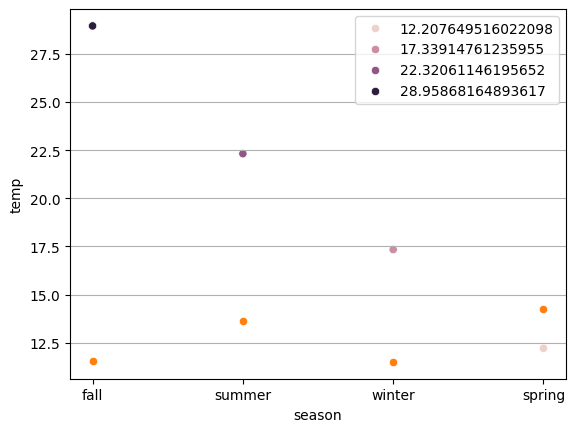

In [48]:
sns.scatterplot(season_temp, x='season', y='temp', hue='temp')
sns.scatterplot(season_winds, x='season', y='windspeed')
plt.grid(True, axis='y')

**Insight:**
- There are more **Registered** Users on the Bike Rental System
- **Fall** has the highest temperature beside other seasons

## Visualization & Explanatory Analysis
Question :
- In 24 Hours, When Does the Average User Rent A Bike?
- Does the Weather Affect when users Rent Bikes?
- How Many Users Uses Bike Rentals In 12 Months Range?
- How Many Users Uses Bike Rentals on Weekdays Compared to Weekends?

### Pertanyaan 1: In 24 Hours, When does the average User rent a bike?

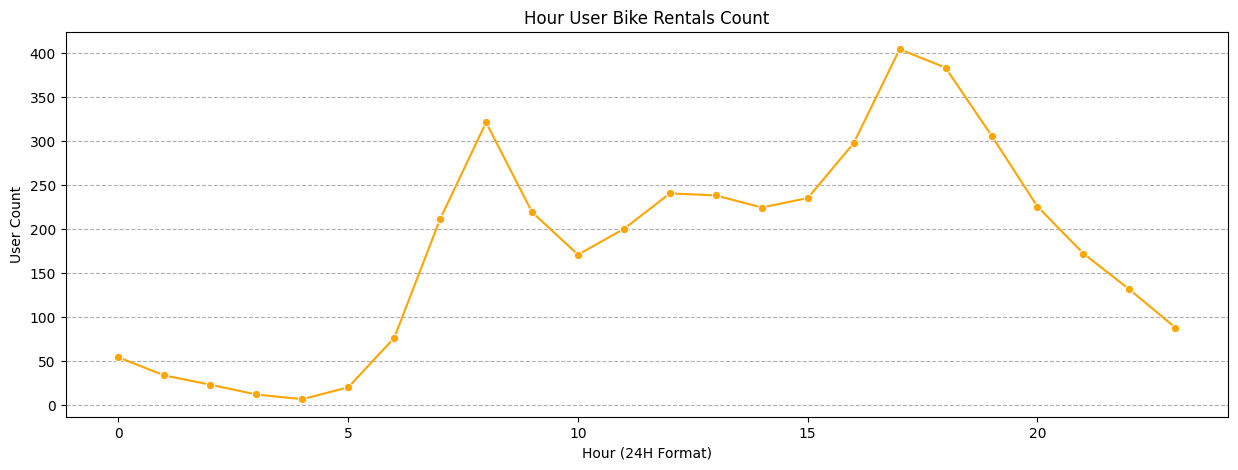

In [49]:
hourly_user = rent_hourly.groupby(by='hr')['cnt'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(hourly_user, x='hr', y='cnt', color='orange', marker='o')
plt.grid(True, which='major', axis='y', linestyle='--')


plt.title('Hour User Bike Rentals Count')
plt.xlabel('Hour (24H Format)')
plt.ylabel('User Count')
plt.show()

### Pertanyaan 2: How Much Average of Temp & Humid by Season?

In [55]:
seasonth

,season,temp,hum
0,fall,28.958682,63.348206
1,spring,12.207650,58.290291
2,summer,22.320611,62.694833
3,winter,17.339148,66.871917


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4152\3804138232.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=seasonth, x='season', y='temp', palette='rocket')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4152\3804138232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax2, data=seasonth, x='season', y='hum', palette='rocket') # data=weatherby_hour, x='weathersit', y='cnt'


Text(0, 0.5, 'Average Humid')

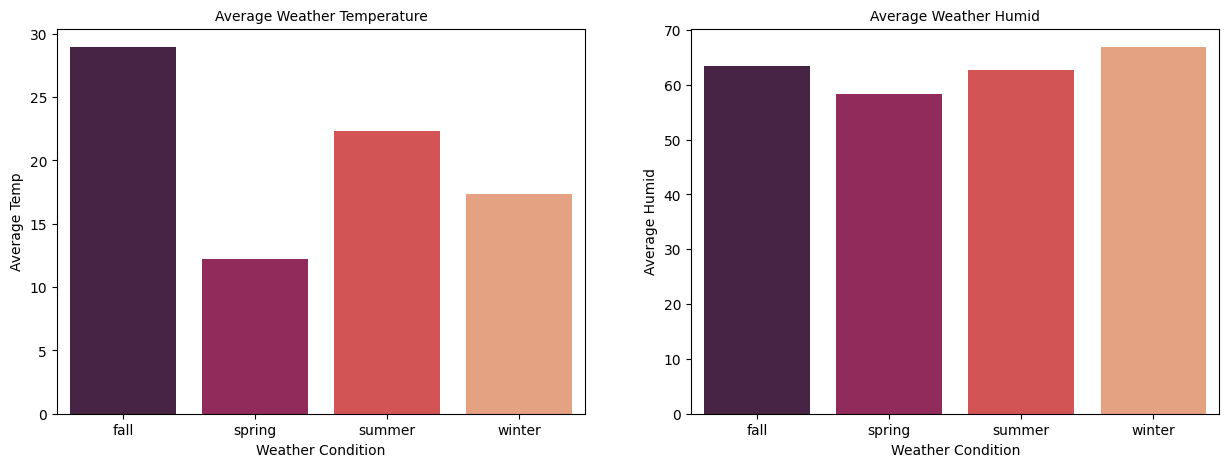

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Based on daily
sns.barplot(ax=ax1, data=seasonth, x='season', y='temp', palette='rocket')
ax1.set_title('Average Weather Temperature', fontsize=10)
ax1.set_xlabel('Weather Condition')
ax1.set_ylabel('Average Temp')

# Based On Hour
sns.barplot(ax=ax2, data=seasonth, x='season', y='hum', palette='rocket') # data=weatherby_hour, x='weathersit', y='cnt'
ax2.set_title('Average Weather Humid', fontsize=10)
ax2.set_xlabel('Weather Condition')
ax2.set_ylabel('Average Humid')

### Questions 3 : How Many Users Bike Rentals in Season?

In [56]:
seasonby

,season,cnt
0,fall,5617.356383
1,spring,2599.225138
2,summer,4942.918478
3,winter,4715.001404


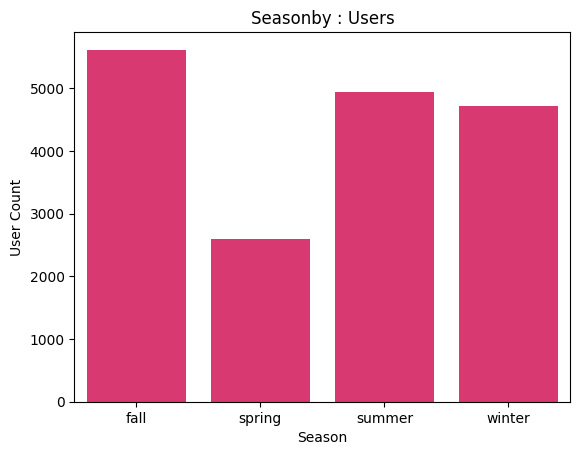

In [57]:
sns.barplot(data=seasonby, x='season', y='cnt', color='#f31e68', errorbar=None)

# Add Title and Labels
plt.title('Seasonby : Users')
plt.xlabel('Season')
plt.ylabel('User Count')
plt.show()

### Questions 4 : How Many Users Use Bike Rentals on Weekdays Compared to Holidays?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4152\1997521082.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax1, data=workingby, x='workingday', y='cnt', palette='rocket')


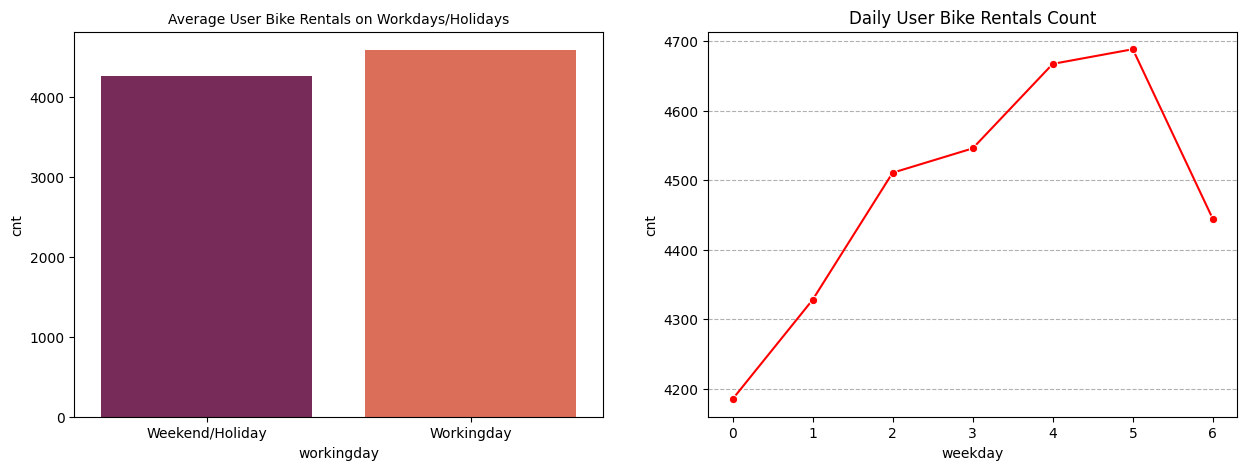

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Based on daily
sns.barplot(ax=ax1, data=workingby, x='workingday', y='cnt', palette='rocket')
ax1.set_title('Average User Bike Rentals on Workdays/Holidays', fontsize=10)

# Based On Hour
sns.lineplot(daily_user, x='weekday', y='cnt', color='red', marker='o')
ax2.set_title('Daily User Bike Rentals Count')
ax2.grid(True, which='major', axis='y', linestyle='--')
plt.show()

**Insight:**
- User tend to rent bikes in the morning between 6 a.m - 9 a.m to go to work & between 4 p.m - 8 p.m user went back home from work
- Theres a peak user on Thursday & Friday
- Clear Weather has positive impact on increase in number of user rent bikes as they choice of transportation
- In month trend shows between June & September has been an increase of user because fall season, Users would like to rent bikes as they are clear weather or cloudy
- User rarely use bike rental in the weekend

## Analisis Lanjutan (Opsional)

### User Group Clustering : How many users use bicycle rental services in Daily based on user type category?

In [64]:
daily_category_user = rent_hourly.groupby(by='weekday')[['casual', 'registered']].mean().reset_index()
daily_category_user

,weekday,casual,registered
0,0,43.980815,121.290168
1,1,27.263009,148.847519
2,2,23.457807,159.748879
3,3,22.782222,159.146263
4,4,24.743019,163.135168
5,5,30.382791,160.044632
6,6,45.085191,128.962978


<Figure size 500x500 with 0 Axes>

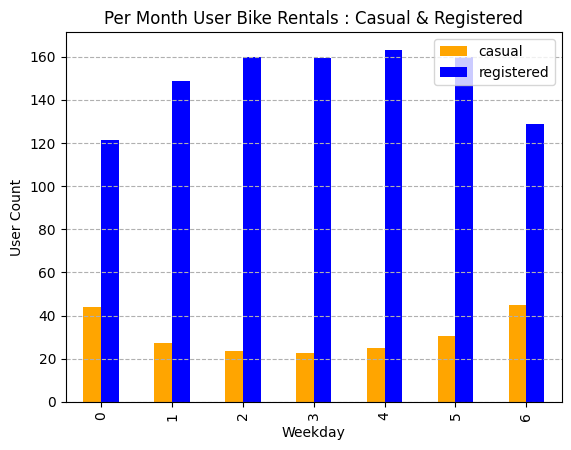

In [67]:
plt.figure(figsize=(5, 5))
daily_category_user.plot(kind='bar', x='weekday', stacked=False, color=['orange', 'blue'])

plt.title('Per Month User Bike Rentals : Casual & Registered')
plt.grid(True, which='major', axis='y', linestyle='--')

plt.xlabel('Weekday')
plt.ylabel('User Count')
plt.show()

## Conclusion

+ Conclusion Question 1 : 
    - Peak Hours happened at 8.am and 5 p.m, which means in everyday users tend to use bike rentals to go to work in the morning (8 a.m) and go back from work (5 p.m) as their main choice of transportation going pass through city traffic.
    - Meanwhile decreasing trend show inactive hour as there no productive activities from 9pm till 5am

+ Conclusion Question 2 : 
    - The Highest Average Temperature which is on Fall with a value of averaging 28.9 Celcius, meanwhile the Highest Humid is on Winter averaging 66.8%
    - From this insight, temperature increases, warmer air can hold more water vapor. For example, at 20°C (68°F), air can hold twice as much water vapor as it can at 28°C. If the amount of water vapor in the air stays the same, the relative humidity decreases. Conversely high humidity created more cooler/chilled temperature cause of the amount of low water vapor in air from the low temperature.

+ Conclusion Question 3 : 
    - Users tend to cycle during fall season, supported by user counts have the highest number bike rentals in fall season.
    - From earlier question, during fall season has more users than other season, season fall has both relative high average temperature and humidity (temp=28 C, hum=63%) with clear weather, Fall strikes a balance: warm enough to avoid cold discomfort but cool enough to prevent heat stress, with minimal rain disruption.

+ Conclusion Question 4 : 
    - Users tend to chose Bike Rentals as their mode of transportation cycling through city traffic every working day from Monday - Friday and had a peak count of users in Friday.

+ Conclusion Question 5 (Advanced) : 
    - The number of registered users who use the rental system on weekdays is greater, so they prioritize practical use to avoid traffic jams on weekdays or the distance to the workplace which is close.
    - Meanwhile, regular users tend to use bicycle rentals for recreational purposes on holidays.

After Exploring the data, this concludes that User Rent bikes as their main choice of transportation to go to work in the morning and go back from work in the evening, additional fact they chose rental bike is clear/cloudy weather as they enjoy the fall season is a great season for riding bikes. (https://transportation.ucla.edu/blog/why-fall-best-season-bike-riding)

+ Recommended act after this analysis is :
    - Charge premium rates during peak hours on weekdays (around 8am & 9am)
    - Marketing campaign to casual users with weekend promo discounts and holidays occasions example : valentine couple ride discount, family ride discount, package with recreational parks tickets, etc.